# Import modules

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Pandas and numpy for data wrangling
# matplotlib and seaborn for plotting
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set matplotlib style
plt.style.use("fivethirtyeight")
pd.options.display.max_columns = None

# random seed
np.random.seed(0)

# Load the data

In [2]:
train_data = pd.read_csv("./input/train.csv")
test_data = pd.read_csv("./input/test.csv")
match_reports = pd.read_csv("./input/match_reports.csv")
stadium_capacity_mapping = pd.read_csv("./input/stadium_capacity_mapping.csv")
stadium_capacity_mapping = stadium_capacity_mapping.rename(columns={"stadium": "venue"})
holidays_in_japan = pd.read_csv("./input/holidays_in_japan.csv")
holidays_in_japan = holidays_in_japan.rename(columns={"holiday_date": "match_date"})

## Preview train_data

In [3]:
train_data.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40,NHK総合/J SPORTS(録),20916
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42,J SPORTS,28564
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199


## Preview test_data

In [4]:
test_data.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters
0,19075,2017-02-25,12:35,第1節,第1日,横浜FM,浦和,日産スタジアム,晴,10.2,45.0,DAZN/テレビ神奈川/テレ玉
1,19076,2017-02-25,14:04,第1節,第1日,仙台,札幌,ユアテックスタジアム仙台,曇,10.6,36.0,DAZN/NHK仙台/NHK札幌
2,19077,2017-02-25,14:04,第1節,第1日,鹿島,FC東京,県立カシマサッカースタジアム,晴,10.1,63.0,DAZN/NHK総合
3,19078,2017-02-25,14:04,第1節,第1日,清水,神戸,IAIスタジアム日本平,晴,15.0,40.0,DAZN/NHK BS1/テレビ静岡
4,19079,2017-02-25,14:04,第1節,第1日,広島,新潟,エディオンスタジアム広島,晴,11.2,45.0,DAZN/NHK広島/NHK新潟


## Preview match_reports

In [5]:
match_reports.head()

,id,home_team_player11,home_team_player10,home_team_player9,home_team_player8,home_team_player7,home_team_player6,home_team_player5,home_team_player4,home_team_player3,home_team_player2,home_team_player1,home_team_score,away_team_score,away_team_player1,away_team_player2,away_team_player3,away_team_player4,away_team_player5,away_team_player6,away_team_player7,away_team_player8,away_team_player9,away_team_player10,away_team_player11
0,9190,9 マグノ アウベス FW,8 フェルナンジーニョ FW,10 二川 孝広 MF,7 遠藤 保仁 MF,27 橋本 英郎 MF,17 明神 智和 MF,14 家長 昭博 DF,6 山口 智 DF,2 シジクレイ DF,21 加地 亮 DF,22 藤ヶ谷 陽介 GK,1,1,23 都築 龍太 GK,2 坪井 慶介 DF,4 田中 マルクス闘莉王 DF,20 堀之内 聖 DF,6 山田 暢久 MF,17 長谷部 誠 MF,13 鈴木 啓太 MF,8 三都主 アレサンドロ MF,18 小野 伸二 MF,10 ポンテ FW,21 ワシントン FW
1,9191,18 長谷川 太郎 FW,16 バレー FW,11 宇留野 純 FW,31 林 健太郎 MF,25 鈴木 健太 MF,8 倉貫 一毅 MF,4 山本 英臣 DF,20 ビジュ DF,15 アライール DF,32 杉山 新 DF,1 阿部 謙作 GK,0,2,21 西部 洋平 GK,25 市川 大祐 DF,26 青山 直晃 DF,4 高木 和道 DF,3 山西 尊裕 DF,13 兵働 昭弘 MF,7 伊東 輝悦 MF,16 枝村 匠馬 MF,10 藤本 淳吾 MF,18 チョ ジェジン FW,17 マルキーニョス FW
2,9192,9 ルーカス FW,21 ササ サルセード FW,35 リチェーリ FW,6 今野 泰幸 MF,23 梶山 陽平 MF,19 伊野波 雅彦 MF,15 鈴木 規郎 DF,5 増嶋 竜也 DF,2 茂庭 照幸 DF,25 徳永 悠平 DF,1 土肥 洋一 GK,2,0,1 西川 周作 GK,2 三木 隆司 DF,4 深谷 友基 DF,22 上本 大海 DF,5 エジミウソン MF,11 トゥーリオ MF,6 梅田 高志 MF,17 根本 裕一 MF,26 内村 圭宏 MF,13 高松 大樹 FW,9 オズマール FW
3,9193,15 西野 泰正 FW,22 カレン ロバート FW,7 名波 浩 MF,14 村井 慎二 MF,23 福西 崇史 MF,25 ファブリシオ MF,11 西 紀寛 MF,6 服部 年宏 DF,5 田中 誠 DF,2 鈴木 秀人 DF,1 川口 能活 GK,1,1,1 水谷 雄一 GK,22 中村 北斗 DF,4 金古 聖司 DF,5 千代反田 充 DF,3 アレックス DF,7 宮崎 光平 MF,6 布部 陽功 MF,8 ホベルト MF,14 古賀 誠史 MF,27 田中 佑昌 FW,36 グラウシオ FW
4,9194,19 杉本 恵太 FW,11 玉田 圭司 FW,27 片山 奨典 MF,7 中村 直志 MF,14 吉村 圭司 MF,8 金 正友 MF,6 有村 光史 DF,29 深津 康太 DF,5 古賀 正紘 DF,4 大森 征之 DF,22 川島 永嗣 GK,3,2,22 吉田 宗弘 GK,2 ブルーノ クアドロス DF,5 前田 和哉 DF,3 柳本 啓成 DF,4 河村 崇大 MF,23 下村 東美 MF,10 ピンゴ MF,6 ゼ カルロス MF,8 森島 寛晃 FW,20 西澤 明訓 FW,9 古橋 達弥 FW


## Preview stadium_capacity_mapping

In [6]:
stadium_capacity_mapping.head()

,venue,capacity
0,日産スタジアム,72081
1,埼玉スタジアム2002,62010
2,国立競技場,54224
3,静岡スタジアムエコパ,51697
4,エコパスタジアム,51697


## Preview holidays in japan

In [7]:
holidays_in_japan.head()

,match_date,description
0,2006-01-01,New Years Day
1,2006-01-02,New Years Holiday
2,2006-01-03,New Years Holiday
3,2006-01-09,Coming-of-age Day
4,2006-02-11,National Foundation Day


# Preprocessing

## Check NaNs

In [8]:
NaNs = test_data[test_data.isnull().any(axis=1)]
NaNs.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters
459,30000,2018-11-24,14:00,第33節,第1日,仙台,鹿島,ユアテックスタジアム仙台,NaN,NaN,NaN,DAZN/NHK仙台
460,30001,2018-11-24,14:00,第33節,第1日,FC東京,川崎Ｆ,味の素スタジアム,NaN,NaN,NaN,DAZN/TOKYO MX
461,30002,2018-11-24,14:00,第33節,第1日,湘南,浦和,ShonanBMWスタジアム平塚,NaN,NaN,NaN,DAZN
462,30003,2018-11-24,14:00,第33節,第1日,清水,神戸,IAIスタジアム日本平,NaN,NaN,NaN,DAZN/テレビ静岡
463,30004,2018-11-24,14:00,第33節,第1日,磐田,札幌,ヤマハスタジアム(磐田),NaN,NaN,NaN,DAZN


## Replace NaNs with manually collected data

### The manually collected data

In [9]:
external_weather = pd.read_csv("external_weather.csv")
external_weather.head()

,id,match_date,weather,temperature,venue
0,30000,2018-11-24,晴のち雲,12,ユアテックスタジアム仙台
1,30001,2018-11-24,晴のち雲,15,味の素スタジアム
2,30002,2018-11-24,晴のち雲,15,ShonanBMWスタジアム平塚
3,30003,2018-11-24,晴のち雲,15,IAIスタジアム日本平
4,30004,2018-11-24,晴のち雲,14,ヤマハスタジアム(磐田)


## Merge test_data and ext_weather

In [10]:
test_data["weather"][459:] = external_weather["weather"]
test_data["temperature"][459:] = external_weather["temperature"]

In [11]:
test_data.loc[459:].head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters
459,30000,2018-11-24,14:00,第33節,第1日,仙台,鹿島,ユアテックスタジアム仙台,晴のち雲,12.0,NaN,DAZN/NHK仙台
460,30001,2018-11-24,14:00,第33節,第1日,FC東京,川崎Ｆ,味の素スタジアム,晴のち雲,15.0,NaN,DAZN/TOKYO MX
461,30002,2018-11-24,14:00,第33節,第1日,湘南,浦和,ShonanBMWスタジアム平塚,晴のち雲,15.0,NaN,DAZN
462,30003,2018-11-24,14:00,第33節,第1日,清水,神戸,IAIスタジアム日本平,晴のち雲,15.0,NaN,DAZN/テレビ静岡
463,30004,2018-11-24,14:00,第33節,第1日,磐田,札幌,ヤマハスタジアム(磐田),晴のち雲,14.0,NaN,DAZN


In [12]:
test_data.loc[459:, "humidity"] = test_data["humidity"].mean()

In [13]:
test_data.loc[459:].head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters
459,30000,2018-11-24,14:00,第33節,第1日,仙台,鹿島,ユアテックスタジアム仙台,晴のち雲,12.0,57.407407,DAZN/NHK仙台
460,30001,2018-11-24,14:00,第33節,第1日,FC東京,川崎Ｆ,味の素スタジアム,晴のち雲,15.0,57.407407,DAZN/TOKYO MX
461,30002,2018-11-24,14:00,第33節,第1日,湘南,浦和,ShonanBMWスタジアム平塚,晴のち雲,15.0,57.407407,DAZN
462,30003,2018-11-24,14:00,第33節,第1日,清水,神戸,IAIスタジアム日本平,晴のち雲,15.0,57.407407,DAZN/テレビ静岡
463,30004,2018-11-24,14:00,第33節,第1日,磐田,札幌,ヤマハスタジアム(磐田),晴のち雲,14.0,57.407407,DAZN


## Concatenate train_data and test_data for easier data wrangling

In [14]:
target = train_data["attendance"]
total_data = pd.concat([train_data.drop(columns="attendance"), test_data])
total_data.tail()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters
472,30013,2018-12-01,14:00,第34節,第1日,川崎Ｆ,磐田,等々力陸上競技場,晴,10.0,57.407407,DAZN
473,30014,2018-12-01,14:00,第34節,第1日,横浜FM,Ｃ大阪,日産スタジアム,晴,10.0,57.407407,DAZN
474,30015,2018-12-01,14:00,第34節,第1日,名古屋,湘南,パロマ瑞穂スタジアム,晴,8.0,57.407407,DAZN
475,30016,2018-12-01,14:00,第34節,第1日,神戸,仙台,ノエビアスタジアム神戸,晴,10.0,57.407407,DAZN/サンテレビ(録)
476,30017,2018-12-01,14:00,第34節,第1日,長崎,清水,トランスコスモススタジアム長崎,晴,11.0,57.407407,DAZN


# Remove unnecessary features

In [15]:
# total_data = total_data.drop(columns=["broadcasters"])
for i in range(1, 12):
    match_reports = match_reports.drop(columns = ["home_team_player" + str(i), "away_team_player" + str(i)])

In [16]:
match_reports.head()

,id,home_team_score,away_team_score
0,9190,1,1
1,9191,0,2
2,9192,2,0
3,9193,1,1
4,9194,3,2


## Add stadium capacity to total data

In [17]:
total_data = pd.merge(total_data, stadium_capacity_mapping, on="venue", how="left")
del stadium_capacity_mapping

In [18]:
total_data.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,capacity
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40.0,NHK総合/J SPORTS(録),21000
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録),15859
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録),48999
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,J SPORTS,51697
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),20223


## Add match reports to total data

### Find which team won and save it as bool

In [19]:
match_reports["home_team_win"] = match_reports["home_team_score"] > match_reports["away_team_score"]
match_reports["away_team_win"] = match_reports["home_team_score"] < match_reports["away_team_score"]


### Add it to total data

In [20]:
total_data = total_data.merge(match_reports[["id", "home_team_win", "away_team_win", "home_team_score", "away_team_score"]],
                          how="left",
                          on="id")

In [21]:
total_data.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,capacity,home_team_win,away_team_win,home_team_score,away_team_score
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40.0,NHK総合/J SPORTS(録),21000,False,False,1.0,1.0
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録),15859,False,True,0.0,2.0
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録),48999,True,False,2.0,0.0
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,J SPORTS,51697,False,False,1.0,1.0
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),20223,True,False,3.0,2.0


## Date preprocessing

### Convert match_date into pandas datetime64 type

In [22]:
total_data["match_date"] = pd.to_datetime(total_data["match_date"])
holidays_in_japan["match_date"] = pd.to_datetime(holidays_in_japan["match_date"])

### Extract match year, month, day and day of week

In [23]:
total_data["match_date_year"] = total_data["match_date"].dt.year
total_data["match_date_month"] = total_data["match_date"].dt.month
total_data["match_date_day"] = total_data["match_date"].dt.day
total_data["match_date_dayofweek"] = total_data["match_date"].dt.dayofweek


In [24]:
total_data.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,capacity,home_team_win,away_team_win,home_team_score,away_team_score,match_date_year,match_date_month,match_date_day,match_date_dayofweek
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40.0,NHK総合/J SPORTS(録),21000,False,False,1.0,1.0,2006,3,4,5
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録),15859,False,True,0.0,2.0,2006,3,5,6
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録),48999,True,False,2.0,0.0,2006,3,5,6
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,J SPORTS,51697,False,False,1.0,1.0,2006,3,5,6
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),20223,True,False,3.0,2.0,2006,3,5,6


# Check if the next day of match is a holiday or not and add it to the total data

In [25]:
new_match_date = total_data["match_date"] + np.timedelta64(1, "D")
new_match_date = new_match_date.to_frame()
new_match_date = pd.merge(new_match_date, holidays_in_japan, on="match_date", how="left")
new_match_date = new_match_date.fillna(0)
new_match_date = new_match_date.rename(columns={"description": "next_day_holiday"})
new_match_date["match_date"] = new_match_date["match_date"] - np.timedelta64(1, "D")
new_match_date["id"] = total_data["id"]
new_match_date = new_match_date.drop(columns = ["match_date"])

total_data = total_data.merge(new_match_date, on="id", how="left")

# Check if the match date is a holiday or not and add it to the total data

In [26]:
new_match_date = total_data["match_date"]
new_match_date = new_match_date.to_frame()
new_match_date = pd.merge(new_match_date, holidays_in_japan, on="match_date", how="left")
new_match_date = new_match_date.fillna(False)
new_match_date = new_match_date.rename(columns={"description": "today_holiday"})
new_match_date["match_date"] = new_match_date["match_date"]
new_match_date["id"] = total_data["id"]
new_match_date = new_match_date.drop(columns = ["match_date"])

total_data = total_data.merge(new_match_date, on="id", how="left")

### Convert holiday dates into bool type

In [27]:
total_data["next_day_holiday"] = total_data["next_day_holiday"].astype(bool)
total_data["today_holiday"] = total_data["today_holiday"].astype(bool)

In [28]:
total_data.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,capacity,home_team_win,away_team_win,home_team_score,away_team_score,match_date_year,match_date_month,match_date_day,match_date_dayofweek,next_day_holiday,today_holiday
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40.0,NHK総合/J SPORTS(録),21000,False,False,1.0,1.0,2006,3,4,5,False,False
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録),15859,False,True,0.0,2.0,2006,3,5,6,False,False
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録),48999,True,False,2.0,0.0,2006,3,5,6,False,False
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,J SPORTS,51697,False,False,1.0,1.0,2006,3,5,6,False,False
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),20223,True,False,3.0,2.0,2006,3,5,6,False,False


## Extract only kick off hour from kick off time

In [29]:
total_data["kick_off_time"] = pd.to_datetime(total_data["kick_off_time"])
total_data["kick_off_hr"] = total_data["kick_off_time"].dt.hour
total_data = total_data.drop(columns=["kick_off_time"])

In [30]:
total_data.head()

,id,match_date,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,capacity,home_team_win,away_team_win,home_team_score,away_team_score,match_date_year,match_date_month,match_date_day,match_date_dayofweek,next_day_holiday,today_holiday,kick_off_hr
0,9190,2006-03-04,第1節,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40.0,NHK総合/J SPORTS(録),21000,False,False,1.0,1.0,2006,3,4,5,False,False,16
1,9191,2006-03-05,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録),15859,False,True,0.0,2.0,2006,3,5,6,False,False,13
2,9192,2006-03-05,第1節,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録),48999,True,False,2.0,0.0,2006,3,5,6,False,False,13
3,9193,2006-03-05,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,J SPORTS,51697,False,False,1.0,1.0,2006,3,5,6,False,False,14
4,9194,2006-03-05,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),20223,True,False,3.0,2.0,2006,3,5,6,False,False,14


## Encode section and round

In [31]:
total_data.loc[:, "section"] = total_data.loc[:, "section"].apply(lambda x: int(x[1:-1]))
total_data.loc[:, "round"] = total_data.loc[:, "round"].apply(lambda x: int(x[1:-1]))

In [32]:
total_data.head()

,id,match_date,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,capacity,home_team_win,away_team_win,home_team_score,away_team_score,match_date_year,match_date_month,match_date_day,match_date_dayofweek,next_day_holiday,today_holiday,kick_off_hr
0,9190,2006-03-04,1,1,G大阪,浦和,万博記念競技場,晴,8.3,40.0,NHK総合/J SPORTS(録),21000,False,False,1.0,1.0,2006,3,4,5,False,False,16
1,9191,2006-03-05,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録),15859,False,True,0.0,2.0,2006,3,5,6,False,False,13
2,9192,2006-03-05,1,2,FC東京,大分,味の素スタジアム,晴,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録),48999,True,False,2.0,0.0,2006,3,5,6,False,False,13
3,9193,2006-03-05,1,2,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,J SPORTS,51697,False,False,1.0,1.0,2006,3,5,6,False,False,14
4,9194,2006-03-05,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),20223,True,False,3.0,2.0,2006,3,5,6,False,False,14


In [33]:
print("total_data NaNs: ", total_data.isna().sum().sum())

total_data NaNs:  72


## Convert full-width characters into half-width characters

In [34]:
import re
def make_zen2han_dic(iterable):
    zen = list("ＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺ" +
               "ａｂｃｄｅｆｇｈｉｊｋｌｍｎｏｐｑｒｓｔｕｖｗｘｙｚ" +
               "０１２３４５６７８９，、．。（）＿−　")
    han = list("ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789,,..()_- ")
    z2h = {}
    pattern = "|".join(zen)
    for it in iterable:
        if re.search(pattern, it) is None:
            continue
        target = it*1
        for z, h in zip(zen, han):
            target = target.replace(z, h)
        z2h[it] = target
    return z2h

teams = set(total_data["home_team"].unique().tolist() + total_data["away_team"].unique().tolist())
z2h = make_zen2han_dic(teams)
total_data["home_team"].replace(z2h, inplace=True)
total_data["away_team"].replace(z2h, inplace=True)

In [35]:
teams = set(total_data["home_team"].unique().tolist() + total_data["away_team"].unique().tolist())
print(teams)

{'清水', '大分', '千葉', '新潟', '鳥栖', '京都', 'FC東京', '浦和', '松本', '鹿島', '横浜FC', '神戸', '東京V', '大宮', '横浜FM', '福岡', '川崎F', '札幌', '磐田', '仙台', '甲府', 'G大阪', '山形', '広島', 'C大阪', '湘南', '長崎', '名古屋', '柏', '徳島'}


In [36]:
for team in teams:
    total_data["team_" + team] = (total_data["home_team"] == team) | (total_data["away_team"] == team)

## Find finalists and runnerups of every year and wins per year to the total data

In [37]:
# Data retrieved from wikipedia
# https://ja.wikipedia.org/wiki/%E6%97%A5%E6%9C%AC%E3%81%AE%E5%85%A8%E5%9B%BD%E3%82%B5%E3%83%83%E3%82%AB%E3%83%BC%E3%83%AA%E3%83%BC%E3%82%B0%E6%AD%B4%E4%BB%A3%E5%84%AA%E5%8B%9D%E3%83%81%E3%83%BC%E3%83%A0_(1%E9%83%A8)#J1%E3%83%AA%E3%83%BC%E3%82%B0(1999-%E7%8F%BE%E5%9C%A8)
years = np.arange(1999, 2018)
teams_first = ["磐田","鹿島","鹿島","磐田","横浜FM","横浜FM",
         "G大阪","浦和","鹿島","鹿島","鹿島","名古屋",
         "柏","広島","広島","G大阪","広島","鹿島", "川崎"]
champion_team_wins = [3, 3, 4, 4, 4, 5, 1, 5, 5, 6, 7, 1, 2, 6, 7, 2, 8, 8, 1]
teams_second = ["清水エスパルス","横浜FM","磐田","横浜FM","磐田","浦和","浦和",
                "川崎F","浦和","川崎F","川崎F","G大阪","名古屋","仙台","横浜FM",
                "浦和","G大阪","浦和","鹿島"]
df = {"match_date_year": years +1, "champion": teams_first, "champion_team_wins": champion_team_wins, "runnerup": teams_second}
finalists = pd.DataFrame(df)
finalists = finalists[finalists["match_date_year"] >= 2005]
# finalists["champion"] = finalists
# finalists = pd.get_dummies(finalists)
finalists.head() 
# total_data = total_data.merge(finalists, on="match_date_year", how="left")
# total_data.head()

,match_date_year,champion,champion_team_wins,runnerup
5,2005,横浜FM,5,浦和
6,2006,G大阪,1,浦和
7,2007,浦和,5,川崎F
8,2008,鹿島,5,浦和
9,2009,鹿島,6,川崎F


In [38]:
total_data = total_data.merge(finalists, on="match_date_year", how="left")
total_data.head()

,id,match_date,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,capacity,home_team_win,away_team_win,home_team_score,away_team_score,match_date_year,match_date_month,match_date_day,match_date_dayofweek,next_day_holiday,today_holiday,kick_off_hr,team_清水,team_大分,team_千葉,team_新潟,team_鳥栖,team_京都,team_FC東京,team_浦和,team_松本,team_鹿島,team_横浜FC,team_神戸,team_東京V,team_大宮,team_横浜FM,team_福岡,team_川崎F,team_札幌,team_磐田,team_仙台,team_甲府,team_G大阪,team_山形,team_広島,team_C大阪,team_湘南,team_長崎,team_名古屋,team_柏,team_徳島,champion,champion_team_wins,runnerup
0,9190,2006-03-04,1,1,G大阪,浦和,万博記念競技場,晴,8.3,40.0,NHK総合/J SPORTS(録),21000,False,False,1.0,1.0,2006,3,4,5,False,False,16,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,G大阪,1,浦和
1,9191,2006-03-05,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録),15859,False,True,0.0,2.0,2006,3,5,6,False,False,13,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,G大阪,1,浦和
2,9192,2006-03-05,1,2,FC東京,大分,味の素スタジアム,晴,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録),48999,True,False,2.0,0.0,2006,3,5,6,False,False,13,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,G大阪,1,浦和
3,9193,2006-03-05,1,2,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,J SPORTS,51697,False,False,1.0,1.0,2006,3,5,6,False,False,14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,G大阪,1,浦和
4,9194,2006-03-05,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),20223,True,False,3.0,2.0,2006,3,5,6,False,False,14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,G大阪,1,浦和


In [39]:
total_data["home_team_champion"] = total_data["home_team"] == total_data["champion"]
total_data["away_team_champion"] = total_data["away_team"] == total_data["champion"]
total_data["home_team_runnerup"] = total_data["home_team"] == total_data["runnerup"]
total_data["away_team_runnerup"] = total_data["away_team"] == total_data["runnerup"]

In [40]:
total_data["home_champion_team_wins"] = total_data["champion_team_wins"] * total_data["home_team_champion"]
total_data["away_champion_team_wins"] = total_data["champion_team_wins"] * total_data["away_team_champion"]
total_data = total_data.drop(columns="champion_team_wins")

In [41]:
total_data.head()

,id,match_date,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,capacity,home_team_win,away_team_win,home_team_score,away_team_score,match_date_year,match_date_month,match_date_day,match_date_dayofweek,next_day_holiday,today_holiday,kick_off_hr,team_清水,team_大分,team_千葉,team_新潟,team_鳥栖,team_京都,team_FC東京,team_浦和,team_松本,team_鹿島,team_横浜FC,team_神戸,team_東京V,team_大宮,team_横浜FM,team_福岡,team_川崎F,team_札幌,team_磐田,team_仙台,team_甲府,team_G大阪,team_山形,team_広島,team_C大阪,team_湘南,team_長崎,team_名古屋,team_柏,team_徳島,champion,runnerup,home_team_champion,away_team_champion,home_team_runnerup,away_team_runnerup,home_champion_team_wins,away_champion_team_wins
0,9190,2006-03-04,1,1,G大阪,浦和,万博記念競技場,晴,8.3,40.0,NHK総合/J SPORTS(録),21000,False,False,1.0,1.0,2006,3,4,5,False,False,16,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,G大阪,浦和,True,False,False,True,1,0
1,9191,2006-03-05,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録),15859,False,True,0.0,2.0,2006,3,5,6,False,False,13,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0
2,9192,2006-03-05,1,2,FC東京,大分,味の素スタジアム,晴,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録),48999,True,False,2.0,0.0,2006,3,5,6,False,False,13,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0
3,9193,2006-03-05,1,2,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,J SPORTS,51697,False,False,1.0,1.0,2006,3,5,6,False,False,14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0
4,9194,2006-03-05,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),20223,True,False,3.0,2.0,2006,3,5,6,False,False,14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,G大阪,浦和,False,False,False,False,0,0


## Add wins per team up to that point to total data

In [42]:
team_wins = pd.DataFrame(list(teams), columns=["team"])
win_sum = []
for team in teams:
    win_sum.append(total_data[total_data["home_team"] == team]["home_team_win"].sum() + total_data[total_data["away_team"] == team]["away_team_win"].sum())
team_wins["wins"] = win_sum


In [43]:
team_wins = team_wins.rename(columns={"team": "home_team", "wins": "home_team_wins"})
total_data = total_data.merge(team_wins, on="home_team", how="left")
team_wins = team_wins.rename(columns={"home_team": "away_team", "home_team_wins": "away_team_wins"})
total_data = total_data.merge(team_wins, on="away_team", how="left")

In [44]:
total_data.head()

,id,match_date,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,capacity,home_team_win,away_team_win,home_team_score,away_team_score,match_date_year,match_date_month,match_date_day,match_date_dayofweek,next_day_holiday,today_holiday,kick_off_hr,team_清水,team_大分,team_千葉,team_新潟,team_鳥栖,team_京都,team_FC東京,team_浦和,team_松本,team_鹿島,team_横浜FC,team_神戸,team_東京V,team_大宮,team_横浜FM,team_福岡,team_川崎F,team_札幌,team_磐田,team_仙台,team_甲府,team_G大阪,team_山形,team_広島,team_C大阪,team_湘南,team_長崎,team_名古屋,team_柏,team_徳島,champion,runnerup,home_team_champion,away_team_champion,home_team_runnerup,away_team_runnerup,home_champion_team_wins,away_champion_team_wins,home_team_wins,away_team_wins
0,9190,2006-03-04,1,1,G大阪,浦和,万博記念競技場,晴,8.3,40.0,NHK総合/J SPORTS(録),21000,False,False,1.0,1.0,2006,3,4,5,False,False,16,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,G大阪,浦和,True,False,False,True,1,0,188,208
1,9191,2006-03-05,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録),15859,False,True,0.0,2.0,2006,3,5,6,False,False,13,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0,69,150
2,9192,2006-03-05,1,2,FC東京,大分,味の素スタジアム,晴,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録),48999,True,False,2.0,0.0,2006,3,5,6,False,False,13,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0,163,51
3,9193,2006-03-05,1,2,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,J SPORTS,51697,False,False,1.0,1.0,2006,3,5,6,False,False,14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0,124,15
4,9194,2006-03-05,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),20223,True,False,3.0,2.0,2006,3,5,6,False,False,14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,G大阪,浦和,False,False,False,False,0,0,164,94


## Encode weather

In [45]:
for condition in ["晴", "曇", "雨", "屋内", "雷", "雪", "霧", "のち", "時々", "一時"]:
    total_data["weather_{}".format(condition)] = total_data["weather"].str.contains(condition)

In [46]:
total_data.head()

,id,match_date,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,capacity,home_team_win,away_team_win,home_team_score,away_team_score,match_date_year,match_date_month,match_date_day,match_date_dayofweek,next_day_holiday,today_holiday,kick_off_hr,team_清水,team_大分,team_千葉,team_新潟,team_鳥栖,team_京都,team_FC東京,team_浦和,team_松本,team_鹿島,team_横浜FC,team_神戸,team_東京V,team_大宮,team_横浜FM,team_福岡,team_川崎F,team_札幌,team_磐田,team_仙台,team_甲府,team_G大阪,team_山形,team_広島,team_C大阪,team_湘南,team_長崎,team_名古屋,team_柏,team_徳島,champion,runnerup,home_team_champion,away_team_champion,home_team_runnerup,away_team_runnerup,home_champion_team_wins,away_champion_team_wins,home_team_wins,away_team_wins,weather_晴,weather_曇,weather_雨,weather_屋内,weather_雷,weather_雪,weather_霧,weather_のち,weather_時々,weather_一時
0,9190,2006-03-04,1,1,G大阪,浦和,万博記念競技場,晴,8.3,40.0,NHK総合/J SPORTS(録),21000,False,False,1.0,1.0,2006,3,4,5,False,False,16,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,G大阪,浦和,True,False,False,True,1,0,188,208,True,False,False,False,False,False,False,False,False,False
1,9191,2006-03-05,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,山梨放送/テレビ静岡(録)/J SPORTS(録),15859,False,True,0.0,2.0,2006,3,5,6,False,False,13,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0,69,150,True,False,False,False,False,False,False,False,False,False
2,9192,2006-03-05,1,2,FC東京,大分,味の素スタジアム,晴,12.1,35.0,BS-i/MXテレビ(録)/J SPORTS(録),48999,True,False,2.0,0.0,2006,3,5,6,False,False,13,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0,163,51,True,False,False,False,False,False,False,False,False,False
3,9193,2006-03-05,1,2,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,J SPORTS,51697,False,False,1.0,1.0,2006,3,5,6,False,False,14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0,124,15,True,False,False,False,False,False,False,False,False,False
4,9194,2006-03-05,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),20223,True,False,3.0,2.0,2006,3,5,6,False,False,14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,G大阪,浦和,False,False,False,False,0,0,164,94,True,False,False,False,False,False,False,False,False,False


## Clean broadcasters

In [47]:
dirty_casters = set()
for casters in total_data["broadcasters"].str.split("/"):
    dirty_casters.update(casters)

In [48]:
clean_casters = set()
def cleanify(caster):
    caster = caster.upper()
    caster = re.sub("\(.+\)|\*", "", caster)
    caster = caster.split("※")[0]\
               .rstrip(" ")\
               .replace("ー", "-")\
               .replace(" ", "_")
    if caster[:4] == "スカパ-":
        caster = "スカパー"
    return caster

for caster in dirty_casters:
    clean_casters.add(cleanify(caster))

In [49]:
tmp = total_data["broadcasters"].str.split("/")\
                              .apply(lambda casters: [cleanify(caster) for caster in casters])
total_data["broadcasters"] = tmp

In [50]:
for caster in clean_casters:
    total_data["broadcasters_{}".format(caster)] = total_data["broadcasters"].apply(lambda casters: caster in casters)

### Ignore less watched broadcasters

In [51]:
caster_counts = total_data.filter(regex="broadcasters_").sum(axis=0)
total_data.drop(caster_counts[caster_counts < 30].index.tolist(), axis=1, inplace=True)

In [52]:
total_data.head()

,id,match_date,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,capacity,home_team_win,away_team_win,home_team_score,away_team_score,match_date_year,match_date_month,match_date_day,match_date_dayofweek,next_day_holiday,today_holiday,kick_off_hr,team_清水,team_大分,team_千葉,team_新潟,team_鳥栖,team_京都,team_FC東京,team_浦和,team_松本,team_鹿島,team_横浜FC,team_神戸,team_東京V,team_大宮,team_横浜FM,team_福岡,team_川崎F,team_札幌,team_磐田,team_仙台,team_甲府,team_G大阪,team_山形,team_広島,team_C大阪,team_湘南,team_長崎,team_名古屋,team_柏,team_徳島,champion,runnerup,home_team_champion,away_team_champion,home_team_runnerup,away_team_runnerup,home_champion_team_wins,away_champion_team_wins,home_team_wins,away_team_wins,weather_晴,weather_曇,weather_雨,weather_屋内,weather_雷,weather_雪,weather_霧,weather_のち,weather_時々,weather_一時,broadcasters_NHK新潟,broadcasters_静岡放送,broadcasters_NHK仙台,broadcasters_TOKYO_MX,broadcasters_TBS,broadcasters_ひかりTV,broadcasters_スカパー,broadcasters_KBS京都,broadcasters_NHK広島,broadcasters_BS,broadcasters_NHK静岡,broadcasters_NHK総合,broadcasters_テレ玉,broadcasters_スカイパ-フェクTV!,broadcasters_DAZN,broadcasters_BS-TBS,broadcasters_J_SPORTS,broadcasters_E2スカチャン,broadcasters_E2スカチャンHD,broadcasters_NHK名古屋,broadcasters_E2,broadcasters_NHK_BS1,broadcasters_BS-I,broadcasters_テレビ静岡
0,9190,2006-03-04,1,1,G大阪,浦和,万博記念競技場,晴,8.3,40.0,"[NHK総合, J_SPORTS]",21000,False,False,1.0,1.0,2006,3,4,5,False,False,16,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,G大阪,浦和,True,False,False,True,1,0,188,208,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
1,9191,2006-03-05,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,"[山梨放送, テレビ静岡, J_SPORTS]",15859,False,True,0.0,2.0,2006,3,5,6,False,False,13,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0,69,150,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2,9192,2006-03-05,1,2,FC東京,大分,味の素スタジアム,晴,12.1,35.0,"[BS-I, MXテレビ, J_SPORTS]",48999,True,False,2.0,0.0,2006,3,5,6,False,False,13,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0,163,51,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,9193,2006-03-05,1,2,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,[J_SPORTS],51697,False,False,1.0,1.0,2006,3,5,6,False,False,14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0,124,15,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,9194,2006-03-05,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,"[スカイパ-フェクTV!, NHK名古屋, NHK大阪, J_SPORTS]",20223,True,False,3.0,2.0,2006,3,5,6,False,False,14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,G大阪,浦和,False,False,False,False,0,0,164,94,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,Fals

# Add polynomial features

In [53]:
# total_data["capacity"] = total_data["capacity"]**2
# total_data["humidity"] = total_data["humidity"]**2
# total_data["temperature"] = total_data["temperature"]**2
# total_data["section"] = total_data["section"]**2
total_data["home_team_wins"] = total_data["home_team_wins"]**2
total_data["away_team_wins"] = total_data["away_team_wins"]**2
total_data["match_date_dayofweek"] = total_data["match_date_dayofweek"]**2
total_data["kick_off_hr"] = total_data["kick_off_hr"]**2
total_data["home_team_win"] = total_data["home_team_win"]**2
# total_data["match_date_year"] = (total_data["match_date_year"] - 2000)**2

In [54]:
total_data["capacity^2"] = total_data["capacity"]**2

In [55]:
# total_data["match_date_year"] ** 2
total_data.head()

,id,match_date,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,capacity,home_team_win,away_team_win,home_team_score,away_team_score,match_date_year,match_date_month,match_date_day,match_date_dayofweek,next_day_holiday,today_holiday,kick_off_hr,team_清水,team_大分,team_千葉,team_新潟,team_鳥栖,team_京都,team_FC東京,team_浦和,team_松本,team_鹿島,team_横浜FC,team_神戸,team_東京V,team_大宮,team_横浜FM,team_福岡,team_川崎F,team_札幌,team_磐田,team_仙台,team_甲府,team_G大阪,team_山形,team_広島,team_C大阪,team_湘南,team_長崎,team_名古屋,team_柏,team_徳島,champion,runnerup,home_team_champion,away_team_champion,home_team_runnerup,away_team_runnerup,home_champion_team_wins,away_champion_team_wins,home_team_wins,away_team_wins,weather_晴,weather_曇,weather_雨,weather_屋内,weather_雷,weather_雪,weather_霧,weather_のち,weather_時々,weather_一時,broadcasters_NHK新潟,broadcasters_静岡放送,broadcasters_NHK仙台,broadcasters_TOKYO_MX,broadcasters_TBS,broadcasters_ひかりTV,broadcasters_スカパー,broadcasters_KBS京都,broadcasters_NHK広島,broadcasters_BS,broadcasters_NHK静岡,broadcasters_NHK総合,broadcasters_テレ玉,broadcasters_スカイパ-フェクTV!,broadcasters_DAZN,broadcasters_BS-TBS,broadcasters_J_SPORTS,broadcasters_E2スカチャン,broadcasters_E2スカチャンHD,broadcasters_NHK名古屋,broadcasters_E2,broadcasters_NHK_BS1,broadcasters_BS-I,broadcasters_テレビ静岡,capacity^2
0,9190,2006-03-04,1,1,G大阪,浦和,万博記念競技場,晴,8.3,40.0,"[NHK総合, J_SPORTS]",21000,0,False,1.0,1.0,2006,3,4,25,False,False,256,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,G大阪,浦和,True,False,False,True,1,0,35344,43264,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,441000000
1,9191,2006-03-05,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28.0,"[山梨放送, テレビ静岡, J_SPORTS]",15859,0,True,0.0,2.0,2006,3,5,36,False,False,169,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0,4761,22500,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,251507881
2,9192,2006-03-05,1,2,FC東京,大分,味の素スタジアム,晴,12.1,35.0,"[BS-I, MXテレビ, J_SPORTS]",48999,1,False,2.0,0.0,2006,3,5,36,False,False,169,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0,26569,2601,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,2400902001
3,9193,2006-03-05,1,2,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42.0,[J_SPORTS],51697,0,False,1.0,1.0,2006,3,5,36,False,False,196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,G大阪,浦和,False,False,False,False,0,0,15376,225,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2672579809
4,9194,2006-03-05,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32.0,"[スカイパ-フェクTV!, NHK名古屋, NHK大阪, J_SPORTS]",20223,1,False,3.0,2.0,2006,3,5,36,False,False,196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,G大阪,浦和,False,False,False,False,0,0,26896,8836,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [56]:
print(total_data.shape)

(3843, 98)


## Remove unnecesary features from total_data

In [57]:
total_data = total_data.dropna()
bool_col = total_data.filter(regex="^weather_").columns.tolist() + ["home_team_win"]
total_data.loc[:, bool_col] = total_data.loc[:, bool_col].astype(np.bool8)

In [58]:
del_col = total_data.select_dtypes(["object", np.datetime64]).columns
total_data.drop(del_col, axis=1, inplace=True)

In [59]:
total_data.head()

,id,section,round,temperature,humidity,capacity,home_team_win,home_team_score,away_team_score,match_date_year,match_date_month,match_date_day,match_date_dayofweek,next_day_holiday,today_holiday,kick_off_hr,team_清水,team_大分,team_千葉,team_新潟,team_鳥栖,team_京都,team_FC東京,team_浦和,team_松本,team_鹿島,team_横浜FC,team_神戸,team_東京V,team_大宮,team_横浜FM,team_福岡,team_川崎F,team_札幌,team_磐田,team_仙台,team_甲府,team_G大阪,team_山形,team_広島,team_C大阪,team_湘南,team_長崎,team_名古屋,team_柏,team_徳島,home_team_champion,away_team_champion,home_team_runnerup,away_team_runnerup,home_champion_team_wins,away_champion_team_wins,home_team_wins,away_team_wins,weather_晴,weather_曇,weather_雨,weather_屋内,weather_雷,weather_雪,weather_霧,weather_のち,weather_時々,weather_一時,broadcasters_NHK新潟,broadcasters_静岡放送,broadcasters_NHK仙台,broadcasters_TOKYO_MX,broadcasters_TBS,broadcasters_ひかりTV,broadcasters_スカパー,broadcasters_KBS京都,broadcasters_NHK広島,broadcasters_BS,broadcasters_NHK静岡,broadcasters_NHK総合,broadcasters_テレ玉,broadcasters_スカイパ-フェクTV!,broadcasters_DAZN,broadcasters_BS-TBS,broadcasters_J_SPORTS,broadcasters_E2スカチャン,broadcasters_E2スカチャンHD,broadcasters_NHK名古屋,broadcasters_E2,broadcasters_NHK_BS1,broadcasters_BS-I,broadcasters_テレビ静岡,capacity^2
0,9190,1,1,8.3,40.0,21000,False,1.0,1.0,2006,3,4,25,False,False,256,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,1,0,35344,43264,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,441000000
1,9191,1,2,12.9,28.0,15859,False,0.0,2.0,2006,3,5,36,False,False,169,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,4761,22500,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,251507881
2,9192,1,2,12.1,35.0,48999,True,2.0,0.0,2006,3,5,36,False,False,169,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,26569,2601,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,2400902001
3,9193,1,2,11.6,42.0,51697,False,1.0,1.0,2006,3,5,36,False,False,196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,15376,225,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2672579809
4,9194,1,2,13.1,32.0,20223,True,3.0,2.0,2006,3,5,36,False,False,196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,0,0,26896,8836,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,408969729


# Training and validation phase

## Extract the target

In [60]:
train_data = total_data.query("id < 19075")
train_data["attendance"] = target.values
train_data = train_data.drop(2479)  # 無観客試合
test_data = total_data.query("id >= 19075")

In [61]:
train_data_y = train_data[["match_date_year", "attendance"]]
train_data = train_data.drop(columns=["id", "attendance"])
test_data = test_data.drop(columns=["id"])

## Split training data into train and test sets

In [62]:
all_train_X = train_data.query("match_date_year <= 2016")
all_train_y = np.log1p(train_data_y.query("match_date_year <= 2016")["attendance"])
test_X = test_data

In [63]:
all_train_X.head()

,section,round,temperature,humidity,capacity,home_team_win,home_team_score,away_team_score,match_date_year,match_date_month,match_date_day,match_date_dayofweek,next_day_holiday,today_holiday,kick_off_hr,team_清水,team_大分,team_千葉,team_新潟,team_鳥栖,team_京都,team_FC東京,team_浦和,team_松本,team_鹿島,team_横浜FC,team_神戸,team_東京V,team_大宮,team_横浜FM,team_福岡,team_川崎F,team_札幌,team_磐田,team_仙台,team_甲府,team_G大阪,team_山形,team_広島,team_C大阪,team_湘南,team_長崎,team_名古屋,team_柏,team_徳島,home_team_champion,away_team_champion,home_team_runnerup,away_team_runnerup,home_champion_team_wins,away_champion_team_wins,home_team_wins,away_team_wins,weather_晴,weather_曇,weather_雨,weather_屋内,weather_雷,weather_雪,weather_霧,weather_のち,weather_時々,weather_一時,broadcasters_NHK新潟,broadcasters_静岡放送,broadcasters_NHK仙台,broadcasters_TOKYO_MX,broadcasters_TBS,broadcasters_ひかりTV,broadcasters_スカパー,broadcasters_KBS京都,broadcasters_NHK広島,broadcasters_BS,broadcasters_NHK静岡,broadcasters_NHK総合,broadcasters_テレ玉,broadcasters_スカイパ-フェクTV!,broadcasters_DAZN,broadcasters_BS-TBS,broadcasters_J_SPORTS,broadcasters_E2スカチャン,broadcasters_E2スカチャンHD,broadcasters_NHK名古屋,broadcasters_E2,broadcasters_NHK_BS1,broadcasters_BS-I,broadcasters_テレビ静岡,capacity^2
0,1,1,8.3,40.0,21000,False,1.0,1.0,2006,3,4,25,False,False,256,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,1,0,35344,43264,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,441000000
1,1,2,12.9,28.0,15859,False,0.0,2.0,2006,3,5,36,False,False,169,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,4761,22500,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,251507881
2,1,2,12.1,35.0,48999,True,2.0,0.0,2006,3,5,36,False,False,169,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,26569,2601,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,2400902001
3,1,2,11.6,42.0,51697,False,1.0,1.0,2006,3,5,36,False,False,196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,15376,225,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2672579809
4,1,2,13.1,32.0,20223,True,3.0,2.0,2006,3,5,36,False,False,196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,0,0,26896,8836,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,408969729


## Data scaling

In [64]:
feature_names = list(all_train_X.columns)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(all_train_X)
all_train_X = scaler.transform(all_train_X)
test_X = scaler.transform(test_X)

C:\Users\samuw\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [65]:
all_train_X = pd.DataFrame(all_train_X, columns = feature_names)
test_X = pd.DataFrame(test_X, columns = feature_names)
all_train_X.head()

,section,round,temperature,humidity,capacity,home_team_win,home_team_score,away_team_score,match_date_year,match_date_month,match_date_day,match_date_dayofweek,next_day_holiday,today_holiday,kick_off_hr,team_清水,team_大分,team_千葉,team_新潟,team_鳥栖,team_京都,team_FC東京,team_浦和,team_松本,team_鹿島,team_横浜FC,team_神戸,team_東京V,team_大宮,team_横浜FM,team_福岡,team_川崎F,team_札幌,team_磐田,team_仙台,team_甲府,team_G大阪,team_山形,team_広島,team_C大阪,team_湘南,team_長崎,team_名古屋,team_柏,team_徳島,home_team_champion,away_team_champion,home_team_runnerup,away_team_runnerup,home_champion_team_wins,away_champion_team_wins,home_team_wins,away_team_wins,weather_晴,weather_曇,weather_雨,weather_屋内,weather_雷,weather_雪,weather_霧,weather_のち,weather_時々,weather_一時,broadcasters_NHK新潟,broadcasters_静岡放送,broadcasters_NHK仙台,broadcasters_TOKYO_MX,broadcasters_TBS,broadcasters_ひかりTV,broadcasters_スカパー,broadcasters_KBS京都,broadcasters_NHK広島,broadcasters_BS,broadcasters_NHK静岡,broadcasters_NHK総合,broadcasters_テレ玉,broadcasters_スカイパ-フェクTV!,broadcasters_DAZN,broadcasters_BS-TBS,broadcasters_J_SPORTS,broadcasters_E2スカチャン,broadcasters_E2スカチャンHD,broadcasters_NHK名古屋,broadcasters_E2,broadcasters_NHK_BS1,broadcasters_BS-I,broadcasters_テレビ静岡,capacity^2
0,0.0,0.0,0.224551,0.321839,0.141453,0.0,0.125,0.142857,0.0,0.1,0.100000,0.694444,0.0,0.0,0.437500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.125,0.0,0.723603,0.885792,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056110
1,0.0,0.5,0.362275,0.183908,0.055045,0.0,0.000,0.285714,0.0,0.1,0.133333,1.000000,0.0,0.0,0.097656,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.097313,0.460579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.018492
2,0.0,0.5,0.338323,0.264368,0.612048,1.0,0.250,0.000000,0.0,0.1,0.133333,1.000000,0.0,0.0,0.097656,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.543906,0.053080,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.445187
3,0.0,0.5,0.323353,0.344828,0.657394,0.0,0.125,0.142857,0.0,0.1,0.133333,1.000000,0.0,0.0,0.203125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.314691,0.004423,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.499120
4,0.0,0.5,0.368263,0.229885,0.128393,1.0,0.375,0.285714,0.0,0.1,0.133333,1.000000,0.0,0.0,0.203125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.550602,0.180763,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.049751


# Training phase

## Random forest

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)

## Random forest cross-validation

In [68]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfr, all_train_X, all_train_y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [69]:
print("K-Fold cross val score:", np.sqrt(-scores))
print("Mean: ", np.sqrt(-scores).mean())
print("Var: ", np.sqrt(-scores).std())

K-Fold cross val score: [0.28833075 0.22949823 0.24216552 0.24713961 0.25979797]
Mean:  0.25338641530925243
Var:  0.019988950658298373


In [70]:
# plt.figure(figsize=(6, 15))
# plt.barh(train_X.columns, rfr.feature_importances_)

In [71]:
# rfr.fit(all_train_X, all_train_y)
# test_pred = rfr.predict(test_X)
# smpsb_df = pd.read_csv("./input/sample_submit.csv", header=None)
# smpsb_df.iloc[:len(test_X), 1] = np.expm1(rfr.predict(test_X))

In [72]:
# smpsb_df.to_csv("tutorial_result2.csv", index=None, header=None)

## XGBoost

In [73]:
import xgboost as xgb
model = xgb.XGBRegressor(n_jobs=-1,
                         max_depth=10,
                         n_estimators=1700,
                         learning_rate=0.05,
                         random_state=0,
                         gamma=0.3,
                         subsample=0.8,
                        reg_lambda=4)
#param_dist = {"max_depth": [10,30,50],
#              "min_child_weight" : [1,3,6],
#              "n_estimators": [200],
#              "learning_rate": [0.05, 0.1,0.16],}

## XGBoost cross-validation

In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, all_train_X, all_train_y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

C:\Users\samuw\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [75]:
print("K-Fold cross val score:", np.sqrt(-scores))
print("Mean: ", np.sqrt(-scores).mean())
print("Var: ", np.sqrt(-scores).std())

K-Fold cross val score: [0.27320401 0.21328259 0.21610366 0.23036736 0.26297698]
Mean:  0.23918692200968975
Var:  0.024514424795268795


## Fit XGBoost to training data

In [76]:
model.fit(all_train_X, all_train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1700,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=4, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

## Plot feature importances

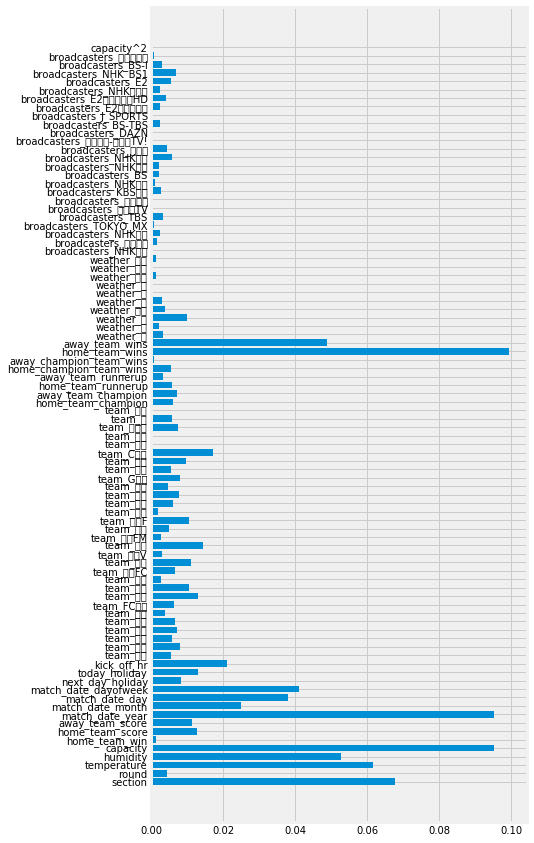

In [77]:
plt.figure(figsize=(6, 15))
plt.barh(all_train_X.columns, model.feature_importances_);

# Create Submission file

In [78]:
smpsb_df = pd.read_csv("./input/sample_submit.csv", header=None)
smpsb_df.iloc[:len(test_X), 1] = np.expm1(model.predict(test_X))

In [79]:
smpsb_df.head()
smpsb_df.to_csv("xgboost5.csv", index=None, header=None)

,0,1
0,19075,41194.421875
1,19076,17225.542969
2,19077,26290.751953
3,19078,17163.472656
4,19079,17564.318359
